In [1]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

In [2]:
ab_testing = pd.read_csv('../data/ab-test.csv')
ab_testing = ab_testing[ab_testing['group'] == 'test']
ab_testing.drop(columns=['time', 'group'], inplace=True)
ab_testing.rename(columns={'diff': 'avg_diff'}, inplace=True)
ab_testing = ab_testing.groupby('uid').mean()
ab_testing

,avg_diff
uid,
user_1,-54.666667
user_18,-6.750000
user_19,-115.166667
user_21,-95.500000
user_25,-98.416667
user_28,-94.750000
user_3,-114.250000


In [3]:
connect = sqlite3.connect('../data/checking-logs.sqlite')

In [4]:
user_commits_count = pd.read_sql('''SELECT uid, COUNT(timestamp) AS commits
                                FROM checker
                                WHERE checker.uid LIKE "user_%" AND checker.labname != "project1"
                                GROUP BY uid''',
                                connect, index_col='uid')
user_commits_count

,commits
uid,
user_0,3
user_1,62
user_10,20
user_11,7
user_12,86
user_13,52
user_14,61
user_15,23
user_16,41


In [5]:
user_pageviews_count = pd.read_sql('''SELECT uid, COUNT(datetime) AS pageviews
                                      FROM pageviews
                                      WHERE pageviews.uid LIKE 'user_%'
                                      GROUP BY uid''',
                                      connect,
                                      index_col='uid')
user_pageviews_count

,pageviews
uid,
user_1,28
user_10,89
user_14,143
user_17,47
user_18,3
user_19,16
user_21,10
user_25,179
user_28,149


In [6]:
ab_testing.head()

,avg_diff
uid,
user_1,-54.666667
user_18,-6.750000
user_19,-115.166667
user_21,-95.500000
user_25,-98.416667


In [7]:
user_commits_count.head()

,commits
uid,
user_0,3
user_1,62
user_10,20
user_11,7
user_12,86


In [8]:
user_pageviews_count.head()

,pageviews
uid,
user_1,28
user_10,89
user_14,143
user_17,47
user_18,3


In [9]:
general = pd.concat([ab_testing, user_pageviews_count, user_commits_count], axis='columns', join='inner')
# general = pd.concat([ab_testing, general], axis='columns', join='outer')
general

,avg_diff,pageviews,commits
uid,,,
user_1,-54.666667,28,62
user_18,-6.750000,3,5
user_19,-115.166667,16,118
user_21,-95.500000,10,65
user_25,-98.416667,179,79
user_28,-94.750000,149,60
user_3,-114.250000,317,18


array([[<AxesSubplot:xlabel='avg_diff', ylabel='avg_diff'>,
        <AxesSubplot:xlabel='pageviews', ylabel='avg_diff'>,
        <AxesSubplot:xlabel='commits', ylabel='avg_diff'>],
       [<AxesSubplot:xlabel='avg_diff', ylabel='pageviews'>,
        <AxesSubplot:xlabel='pageviews', ylabel='pageviews'>,
        <AxesSubplot:xlabel='commits', ylabel='pageviews'>],
       [<AxesSubplot:xlabel='avg_diff', ylabel='commits'>,
        <AxesSubplot:xlabel='pageviews', ylabel='commits'>,
        <AxesSubplot:xlabel='commits', ylabel='commits'>]], dtype=object)

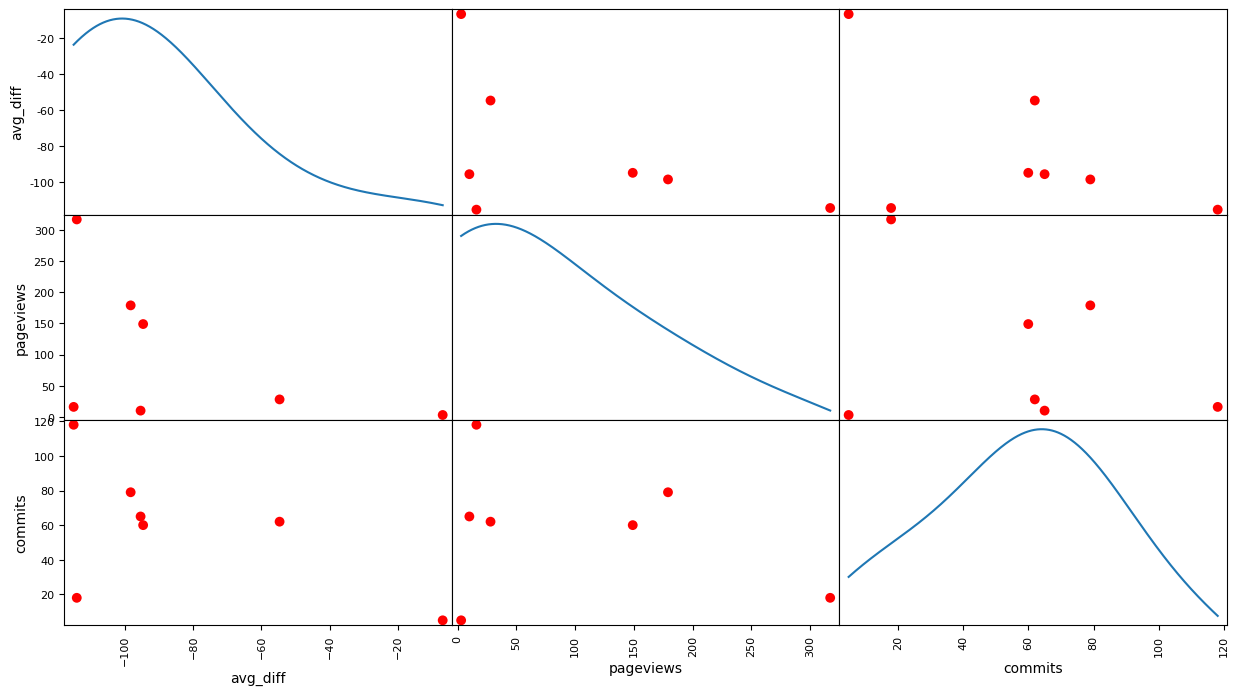

In [10]:
scatter_matrix(general, alpha=1, figsize = (15, 8), diagonal = 'kde', s=200, linewidth=3, color='red')

## Q/A
### Can we say that if a user has a low number of pageviews then they likely have a low number of commits?

The anwser is: no

### Can we say that if a user has a low number of pageviews then they likely have a small average difference between the first commit and the lab deadline?

The anwser is: no

### Can we say that there are many users with a low number of commits and a few with a high number of commits?

The anwser is: yes

### Can we say that there are many users with a small average difference and a few with a large average difference?

The anwser is: no

In [11]:
connect.close()